Name : **Balaji Subramani**  
Matrikel-Nr : **798924**

## Fire in the nature park

***Problem Summary***

The administration of the nature park Montesinho in north-east Portugal wants to predict wild fires based on wheather data of the Fire-Wheather-Index (FWI). The aim is to recognize the affected area and consequently the intensity of the imminent wild fire as early as possible in order to be able to adequatly assess the danger caused by the fire. To this aim, data from 517 wild fires have been collected. The features are summarized below

***Features***

- X (X-coordinate of the fire in the park: 1 to 9)
- Y (Y-coordinate of the fire in the park: 2 to 9)
- Month month: ”jan“ to ”dec“)
- day (day: ”mon“ bis ”sun“)
- FFMC (FFMC index of the FWI system: 18.7 to 96.2)
- DMC (DMC index of the FWI system: 1.1 bis 291.3)
- DC (DC index of the system: 7.9 bis 860.6)
- ISI (ISI index of the FWI systems: 0.0 to 56.1)
- temp (temperature in degrees Celsius: 2.2 to 33.3)
- RH (relative humidity in %: 15 to 100)
- wind (wind velocity in km/h: 0.4 to 9.4)
- rain (rainfall in mm/m2: 0.0 to 6.4)
- **area (forest area that has been burnt in hectare: 0.09 to 1090.84)**

***Goal***

Predict **area** that has been burnt in hectare

Load the data into Python and preprocess them appropriately; perform an adequate normalization of the features. For example, he label area is distributed very non-uniformly such that a transformation such as area0 = log(1 + area) is appropriate. Identify and implement a suitable learning method in Python. Train and evaluate the model. Propose a trivial baseline model with which you can compare your model’s performance. Provide the RMSE (root mean square error) of your model and the baseline model obtained with 10-fold cross-validation. Provide a short documentation and motivation of each of your steps.



In [340]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [341]:
#### Importing the file ####
Path="C:\\Users\\Dell\\Documents\\Python Scripts\ML\\ML Project\\"
Filename='fires.csv'
Data=pd.read_csv(Filename)

In [342]:
#### Function for Renaming day columns for Encoding ####

def renames(feature='day', nbr=12):
    Dict_cols={}
    for i in range(nbr):
        Dict_cols[i]=feature+str(i)
    return Dict_cols
    

## Data Analysis

In [343]:
#### Sample data from data ###
Data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [344]:
#### Features from data ###
Data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [346]:
Data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [345]:
#### Information from dataset ###
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


#### Inference :

- There is no **null** values in data
- X,Y, month, day columns are **categorical values**

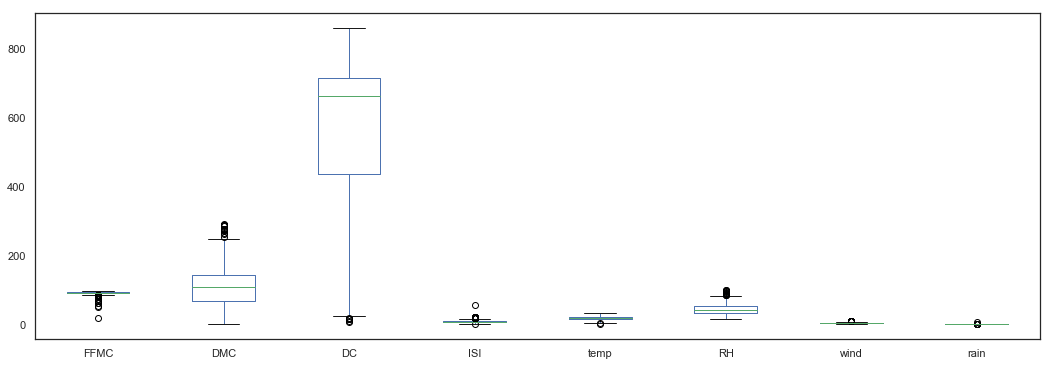

In [347]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
Data[ncols].plot(kind="box", figsize=(18,6))

### Findings from description

- FMCC is mostly between of **90 to 96**. But the minimum is 18. So there are a couple of ***outliers*** in this.
- Same scenario for Rain feature

In [348]:
## Storing Area for future comparision purpose
Data["Orgarea"]=Data["area"]

## Nature Park Map & Affected place

In [ ]:
## Comparing the Fire affected location based on available Map from internet##
## Source of Image : https://www.researchgate.net/figure/The-map-of-the-Montesinho-natural-park_fig1_238767143

import matplotlib.image as mpimg
import seaborn as sns

from matplotlib.pyplot import figure
figure(num=None, figsize=(8,16), dpi=80, facecolor='w', edgecolor='k')

map_img = mpimg.imread('images\map.png') 
plt.imshow(map_img, zorder=0, extent=[0, 10, 0, 10])
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='X', y='Y',size='area', hue='area', data=Data,sizes=(10, 360),palette=cmap)
plt.show()

### Findings from map plot

- Area **(6,5) & (8,6)** is the most affected place and other places are affected very less. So dependent variable data is skewed in left side.


### Encoding the categorical columns (Day, Month, X and Y)

In [351]:
#### Encoding the categorical columns 

dummies= pd.get_dummies(Data['day'])
Encoded_Data=Data.join(dummies)

dummies= pd.get_dummies(Data['month'])
Encoded_Data=Encoded_Data.join(dummies)

dummies= pd.get_dummies(Data['X'])
Encoded_Data=Encoded_Data.join(dummies)
Encoded_Data=Encoded_Data.rename(index=str, columns=renames('X_',Data['X'].max()+1))

dummies= pd.get_dummies(Data['Y'])
dummies=dummies.rename(index=str, columns=renames('Y_',Data['Y'].max()+1))
Encoded_Data=Encoded_Data.join(dummies)

## Droping the old columns and Extra catergorical value field (Degree of freedom from categorical values : n-1)
Encoded_Data=Encoded_Data.drop(columns=['day','month','X','Y','fri', 'dec'])

Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2',       'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4',       'Y_5', 'Y_6', 'Y_8', 'Y_9']

### Correlation Study

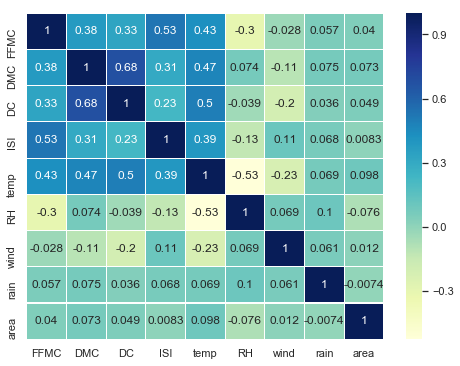

In [353]:
## Checking the independence between the X features

ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
cm = np.corrcoef(Data[ncols].values.T) 
f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

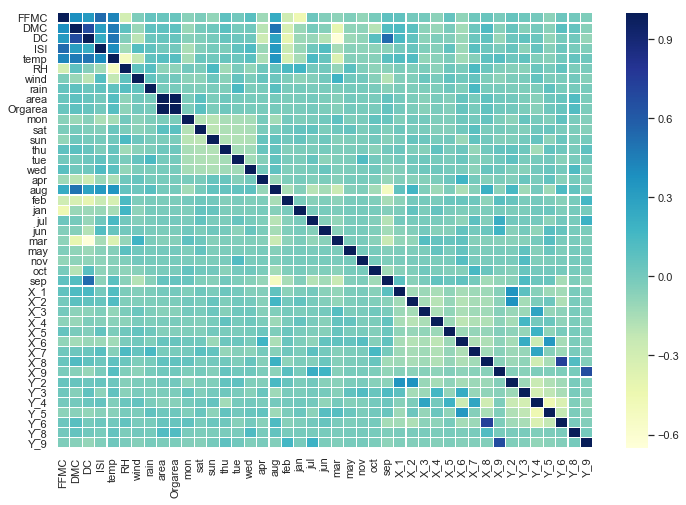

In [354]:
ncols=Encoded_Data.columns
cm = np.corrcoef(Encoded_Data.values.T) 
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=False,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

#### Understanding from Correlation

- All independent columns are not dependent. 

### Finding the pattens

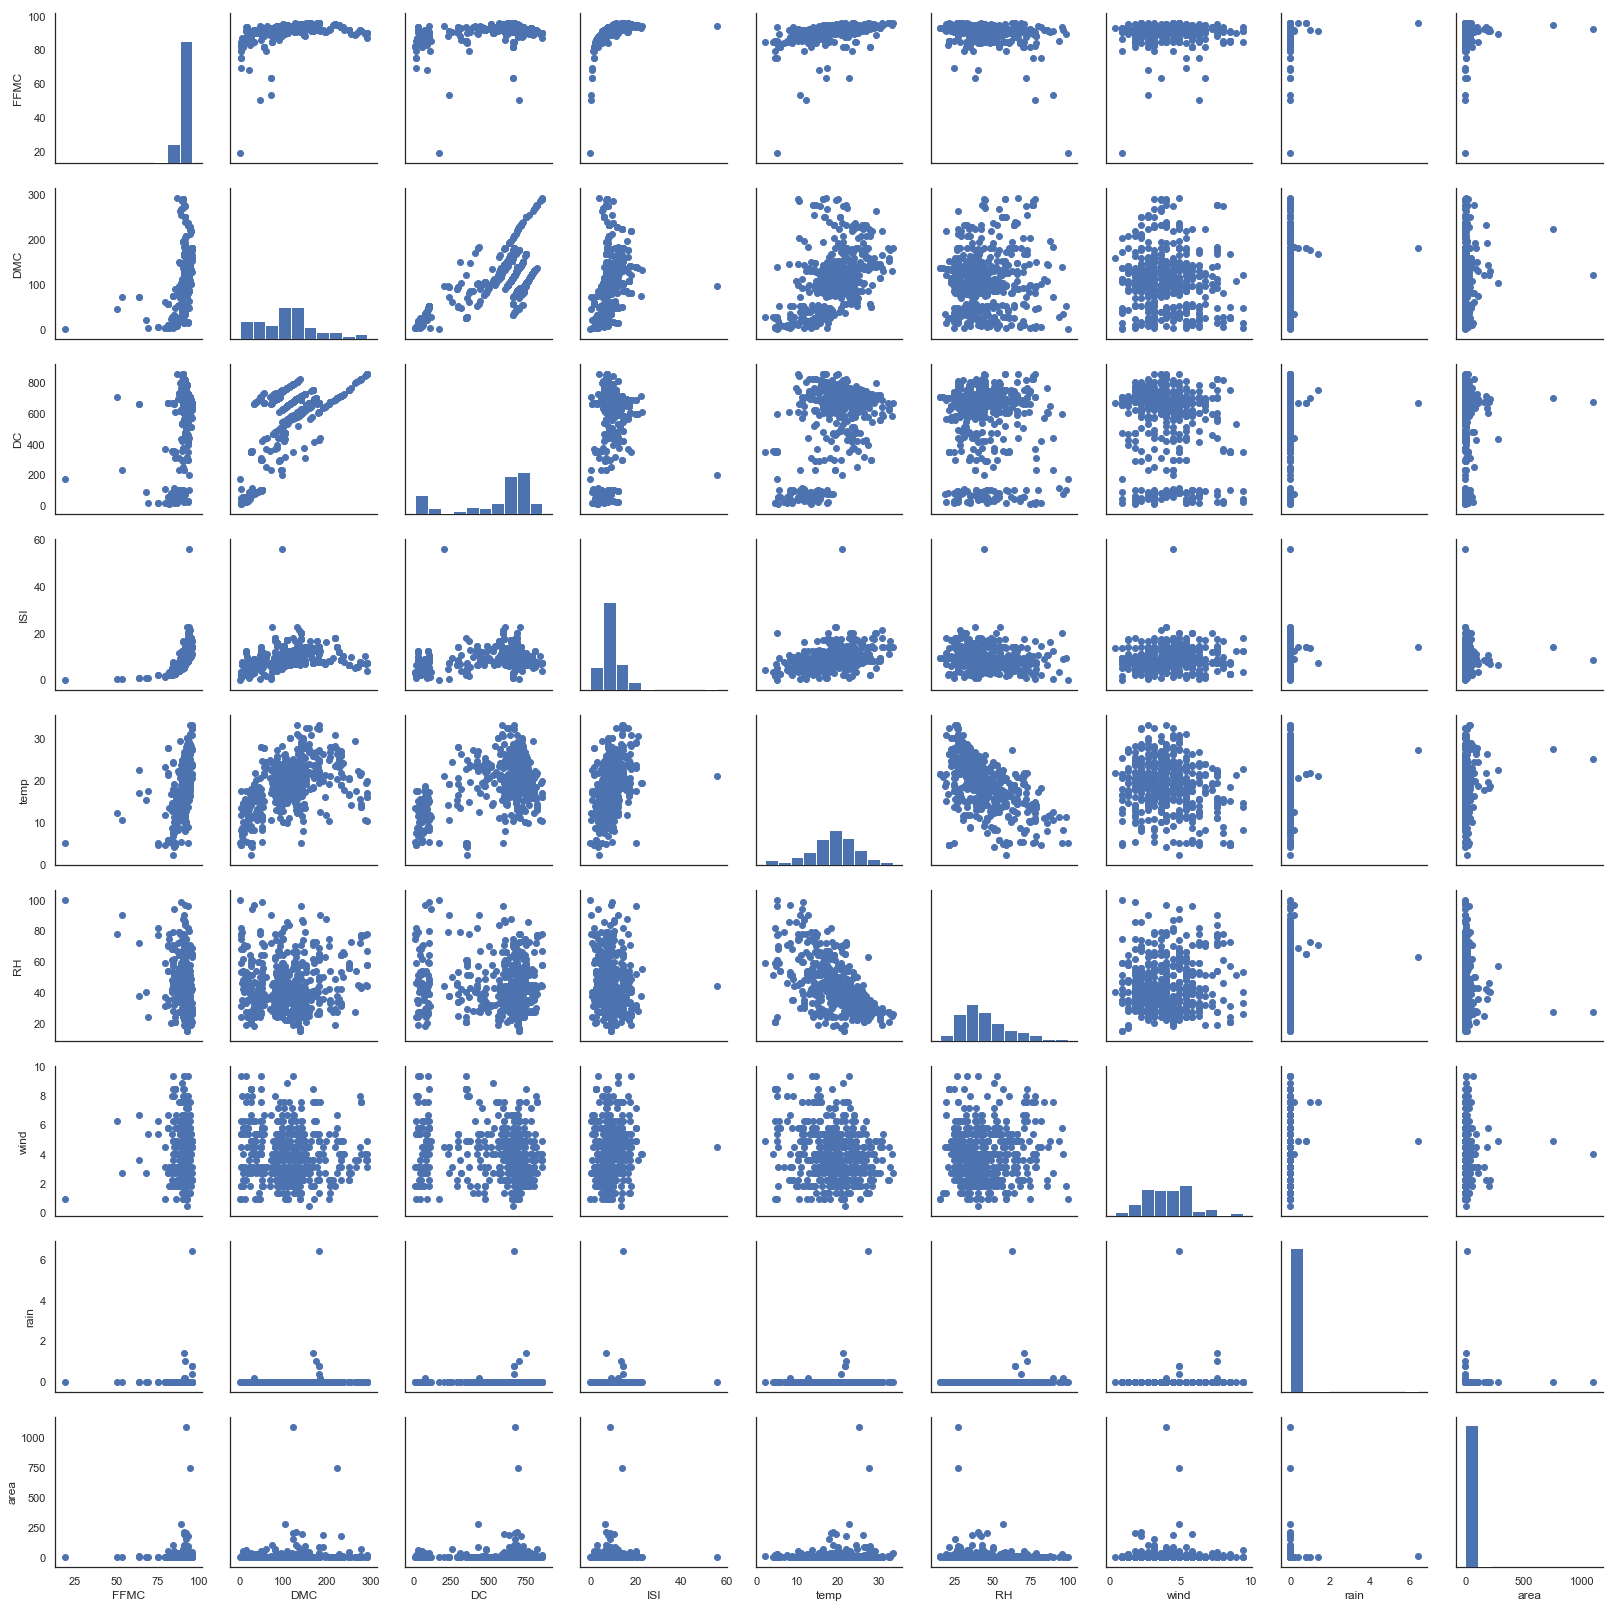

In [355]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain',"area"]
sns.set(style="white")

g = sns.PairGrid(Data[ncols])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

- *Rain & FFMC Feature* - Bar graph shows only one bin as there are **couple of outliers**

## Data Preprocessing

### log transformation & Bounding the Dependent variable

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

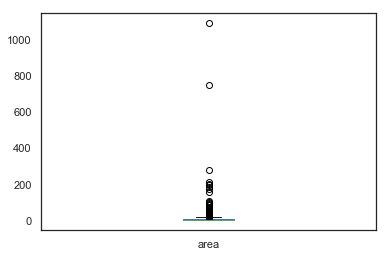

In [356]:
## Box plot
Data["area"].plot(kind='box')

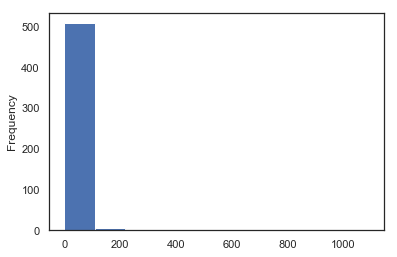

In [357]:
# Fired area in histogram
Data["area"].plot(kind='hist', bins=10)

In [358]:
# Applying Log Transformation
Data["area"]=[ 0 if np.isinf(x) else x for x in (Data["area"]+1).apply(np.log) ]
Encoded_Data["area"]=[ 0 if np.isinf(x) else x for x in (Encoded_Data["area"]+1).apply(np.log) ]

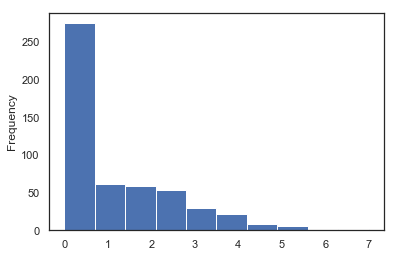

In [359]:
## After log applied
Data["area"].plot(kind='hist', bins=10)

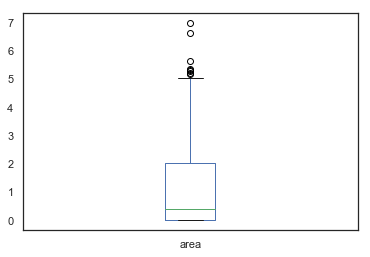

In [360]:
Data["area"].plot(kind='box')

Still, we see some outliers independent variable. It could affect the model building as we have different behavior. Here, **More than 50 percentile of area's are not burned. So it is skewed towards 0**. Hence setting the upper bound


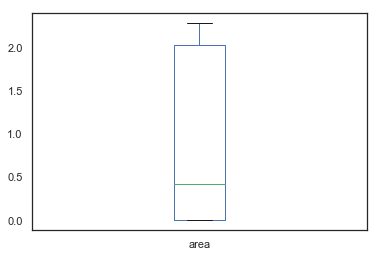

In [497]:
Data["area"].plot(kind='box')

In [ ]:
## Setting upper bound to 85 percentile data as we could not find the common behavour from that.
thersold=0.85
print(str(thersold)" percentile of area (log transformed) is "+Data["area"].quantile(thersold))
print(str(thersold)" percentile of area is "+Data["Orgarea"].quantile(thersold))

Data["area"][Data["area"] > Data["area"].quantile(thersold)]=Data["area"].quantile(thersold)
Encoded_Data["area"][Encoded_Data["area"] > Encoded_Data["area"].quantile(thersold)]=Encoded_Data["area"].quantile(thersold)

In [ ]:
##After setting the upper bound
Data["area"].plot(kind='hist', bins=10)

## Outlier detection & handling for independent variables

Here we are using the *ZScore* for finding the outliers. Then transform the outliers which are more than 3 to median value


In [499]:
allcols=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']

ztrans_data=Data[['X', 'Y', 'month', 'day']]
col_zscores=[]

for col in ncols:
    col_zscore = col + '_zscore'
    ztrans_data[col_zscore] = (Data[col] - Data[col].mean())/Data[col].std(ddof=0)
    col_zscores.append(col_zscore)

In [500]:
## Outliers information in each feature
for col in ncols:
    print(col+ ' column has  '+str(len(Data[np.abs(ztrans_data[col+"_zscore"])>3][col]))+" outliers")
    Data[np.abs(ztrans_data[col+"_zscore"])>3][col]=Data[col].median()

FFMC column has  7 outliers
DMC column has  0 outliers
DC column has  0 outliers
ISI column has  2 outliers
temp column has  0 outliers
RH column has  5 outliers
wind column has  4 outliers
rain column has  3 outliers


## Logistic Regression - Burned or Not

Before getting into the finding of area's burned, I planned to produce one more feature that helps to identify whether it is burned or not with available input data. here we experimented with SVM & Logistics Regression

In [502]:
## Standardzing the input variables

def StandardScalerData(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [503]:
## For Hyper parameter selection

def param_selection(model,param_grid, X_train, y_train, nfolds=10):
#     print(str(datetime.datetime.now())+" : Starting Param selection")
    grid_search = GridSearchCV(model, param_grid, cv=nfolds,verbose =1)
#     grid_search = GridSearchCVProgressBar(model, param_grid, cv=nfolds) 
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
#     print(str(datetime.datetime.now())+" : Param selection is completed")
    return grid_search

In [504]:
## Creating a categorical output 

Data['burned']=1
Data['burned'][Data["area"]==0]=0

Encoded_Data['burned']=1
Encoded_Data['burned'][Encoded_Data["area"]==0]=0

Data['burned'].value_counts()

1    270
0    247
Name: burned, dtype: int64

In [505]:
Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2','X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4','Y_5', 'Y_6', 'Y_8', 'Y_9']
std_cols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [506]:
## Apply the standard scales only for numeric features
Standarized_Data=Encoded_Data
Standarized_Data[std_cols]=StandardScalerData(Encoded_Data[std_cols])

In [507]:
## Splitting the train & test data
X_train, X_test, y_train, y_test = train_test_split(Standarized_Data[Encod_ncols], Standarized_Data['burned'],  test_size=0.2, random_state=0)

In [508]:
## Applying logistic regression with different parameters

LGR_grid_result=param_selection(linear_model.LogisticRegression(),{'penalty':['l1', 'l2'],'C':[0.00001, 0.0001, 0.001,0.01,0.5,0.6,0.9,1]}, X_train, y_train,10)
LGR_grid_result.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1, 'penalty': 'l2'}


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.9s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Reproducing the model from best estimator result
modelLG=LogisticRegression(C=0.001, penalty='l2')
modelLG.fit(X_train, y_train)

# Validating the model
y_pred = modelLG.predict(X_test)
y_train_pred=modelLG.predict(X_train)

## Confusion Matrix 
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("Validation with Train")
print("Accuracy "+str(accuracy_score(y_train, y_train_pred)))
print("Recall "+str(recall_score(y_train, y_train_pred)))
print("Precision "+str(precision_score(y_train, y_train_pred)))
print(" ")

print("Validation with Test")
print("Accuracy "+str(accuracy_score(y_test, y_pred)))
print("Recall "+str(recall_score(y_test, y_pred)))
print("Precision "+str(precision_score(y_test, y_pred)))
print(" ")


## K Fold Validation with 10 Folds
scores = cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="accuracy")
scores=np.sqrt(abs(scores))
print("Cross Validation Scores :")
print(scores)
print("Means Cross Validation Score :"+str(np.mean(scores)))


In [510]:
## Applying SVM with different parameters
SVC_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,50,100,150], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 'kernel':['poly','rbf']}
SVC_grid_result=param_selection(SVC(),SVC_param_grid, X_train, y_train,5)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   12.5s finished


In [511]:
SVC_grid_result.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

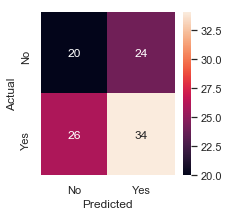

Validation with Train
Accuracy 0.6682808716707022
Recall 0.6857142857142857
Precision 0.6697674418604651
 
Validation with Test
Accuracy 0.5192307692307693
Recall 0.5666666666666667
Precision 0.5862068965517241
 
Cross Validation Scores :
[0.66506217 0.65044364 0.73379939 0.77211    0.74678799 0.84352739
 0.65044364 0.7540739  0.71400555 0.71400555]
Means Cross Validation Score :0.7244259208339294


In [512]:
# Reproducing the model from best estimator result
modelSVC=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
modelSVC.fit(X_train, y_train)

## Validation
y_pred = modelSVC.predict(X_test)
y_train_pred=modelSVC.predict(X_train)


fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("Validation with Train")
print("Accuracy "+str(accuracy_score(y_train, y_train_pred)))
print("Recall "+str(recall_score(y_train, y_train_pred)))
print("Precision "+str(precision_score(y_train, y_train_pred)))
print(" ")

print("Validation with Test")
print("Accuracy "+str(accuracy_score(y_test, y_pred)))
print("Recall "+str(recall_score(y_test, y_pred)))
print("Precision "+str(precision_score(y_test, y_pred)))
print(" ")

scores = cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="accuracy")
scores=np.sqrt(abs(scores))
print("Cross Validation Scores :")
print(scores)
print("Means Cross Validation Score :"+str(np.mean(scores)))


### Model selection 
-  From above 2 models, Logistic is better with not only accuracy metric, but also with precision & recall
-  So using the Logistic model to predict whether the area is burned or not


In [513]:
Standarized_Data['BurnedPred']=modelLG.predict(Standarized_Data[Encod_ncols])

In [514]:
Data['BurnedPred']=modelLG.predict(Standarized_Data[Encod_ncols])
Encoded_Data['BurnedPred']=modelLG.predict(Standarized_Data[Encod_ncols])

## Model Bulding & Evaluation

In [557]:
## Common Function for validations - validate Train and Test data metrics, Cross Validation, Overall Validation

def Validations(model,X_col, Data,X_train, X_test, y_train, y_test,coeffs=0):
    y_col="area"
    
    ## Train dataset Validation
    y_train_pred=model.predict(X_train)
    print("Validation with Train dataset :")
    print("_______________________________")
    print("RMSE Score "+str(np.sqrt(mean_squared_error(y_train,y_train_pred))))
    print("Actual Data : Min: "+str(y_train.min())+" , Max :"+str(y_train.max()))
    print("Predicted Data : Min: "+str(y_train_pred.min())+" , Max :"+str(y_train.max()))
    
    
    ## Test dataset Validation
    y_pred=model.predict(X_test)
    print(" ")
    print("Validation with Test dataset :")
    print("_______________________________")
    print("RMSE Score "+str(np.sqrt(mean_squared_error(y_test, y_pred))))
    print("Actual Data : Min: "+str(y_test.min())+" , Max :"+str(y_test.max()))
    print("Predicted Data : Min: "+str(y_pred.min())+" , Max :"+str(y_pred.max()))

    plt.subplots(figsize=(8,8))
    
    
    ## Ploting the Prediction & Actual test data in scatter plot
    plt.subplot(2,2,1)
    plt.scatter(y_test,y_pred)
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.title('Test data comparision')
    
    ## K Fold Validation
    scores = cross_val_score(model, Data[X_col], Data[y_col], cv=10, scoring="neg_mean_squared_error")
    scores=np.sqrt(abs(scores))
    
    
    ## Plotting the result of K Fold Validation
    plt.subplot(2,2,2)
    pd.Series(np.sqrt(scores)).plot(kind="box", label="RMSE");
    plt.title('RMSE from 10 Folds')
    
    print(" ")
    print("10 Fold validation :")
    print("_______________________________")
    print("Cross Validation RMSE Scores "+str(scores))
    print("Cross Validation RMSE Mean Score "+str(np.mean(scores, dtype=np.float64)))
    
    ## RMSE of Orginal Area
    print("Cross Validation RMSE Mean Score Orginial Burned Area Value "+str(np.exp(np.mean(scores, dtype=np.float64))-1))
    
    ## Multiplying the BurnedPred Feature with Predicted value
    print(" ")
    print("With effect of Burned Categorical Feature  ")
    print("_______________________________")
    Data_pred=model.predict(Data[X_col])
    Data_pred=Data_pred*Data['BurnedPred']
    print("RMSE of Log Transformed Area : "+str(np.sqrt(mean_squared_error(Data[y_col], Data_pred))))
    ## RMSE of Orginal Area
    print("RMSE of Orginal Area : "+str(np.exp(np.sqrt(mean_squared_error(Data[y_col], Data_pred)))-1))
    
    print(" ")
    
    ## Ploting the Prediction & Actual Whole data in scatter plot
    plt.subplot(2,2,3)
    plt.scatter(Data[y_col], Data_pred)
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.title('Whole data comparision')
    plt.tight_layout()
    
    
    
    if coeffs==1:
        ## coefficients of features: Only for linear algorithm
        plt.subplot(2,2,4)
        coefs=pd.DataFrame({'Featrures':X_col, 'Coeff':model.coef_})
        ## Accounting both positive & negative important coefficients
        coefs=pd.concat([coefs.sort_values(by=['Coeff'],ascending=False).head(5),coefs.sort_values(by=['Coeff'],ascending=False).tail(5)])
        print("Top & Bottom 5 Features of Coeff's")
        print("_______________________________")
        print(coefs)
        
        plt.bar(coefs['Featrures'], coefs['Coeff'])
        plt.xticks(rotation=70)
        plt.title('Top & Bottom 5 Features of Coeff''s ')
    
    elif coeffs==2:
        ## To display the important features : Only for Random Forest algorithm
        plt.subplot(2,2,4)
        coefs=pd.DataFrame({'Featrures':X_col, 'Coeff':model.feature_importances_})
        coefs=coefs.sort_values(by=['Coeff'],ascending=False).head(10)
        print("Top 10 Features of Coeff's")
        print("_______________________________")
        print(coefs)
        plt.bar(coefs['Featrures'], coefs['Coeff'])
        plt.xticks(rotation=70)
        plt.title('Top 10 important Features ')
    
    

### Separate Train & Test data for linear computations

In [544]:
Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2','X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4','Y_5', 'Y_6', 'Y_8', 'Y_9','BurnedPred']
std_cols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [545]:
## Spliting the train & test data
X_train, X_test, y_train, y_test = train_test_split(Standarized_Data[Encod_ncols], Standarized_Data["area"],  test_size=0.2, random_state=0)

In [546]:
## Fitting the linear model
model = LinearRegression(fit_intercept=True, n_jobs=None,normalize=False)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Validation with Train dataset :
_______________________________
RMSE Score 0.8941612483293652
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: -0.42619671380243185 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 1.002905549282864
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.1713384214258582 , Max :2.4094769682157935
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.2510144  1.0864683  0.80883462 1.2601545  1.40041531 1.14341017
 0.92366505 1.11706933 0.97541309 1.68135994]
Cross Validation RMSE Mean Score 1.1647804696933473
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.2052191632159186
 
Validation with Burned Category variable 
_______________________________
RMSE of Log Transformed Area : 1.0202332970749362
RMSE of Orginal Area : 1.7738418176658923
 
Top & Bottom 5 Features of Coeff's
_______________________________
     Featrures  

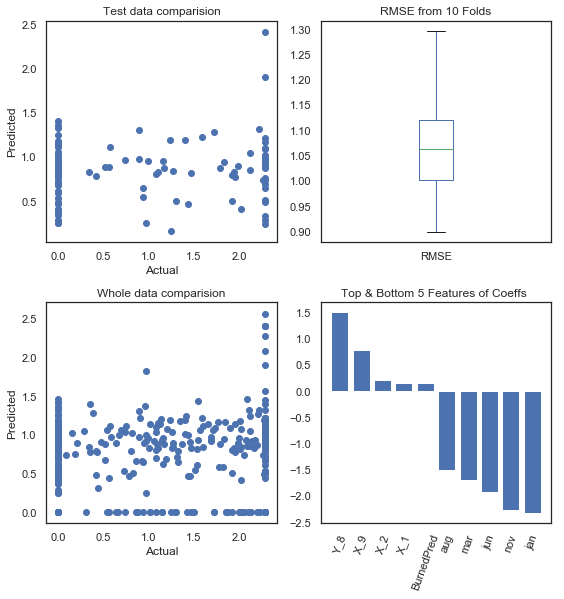

In [548]:
## Validating Linear model
Validations(model,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

In [137]:
# X=Standarized_Data[Encod_ncols]
# X2 = sm.add_constant(Standarized_Data[Encod_ncols])
# est = sm.OLS(Standarized_Data["area"], X)
# est2 = est.fit()
# print(est2.summary())

-  Model is **overfitting**. So going with Regularization

### Lasso

In [524]:
## Hyper parameter selection Lasso
LS_grid_result=param_selection(linear_model.Lasso(),{'alpha':[0.00001, 0.0001, 0.001,0.01],'normalize':[False]}, X_train, y_train,10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.01, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s finished


In [525]:
LS_grid_result.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Validation with Train dataset :
_______________________________
RMSE Score 0.9310983089103283
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.27805594477149953 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 0.985928290219242
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.3479932943785301 , Max :1.4495092763409319
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.13233685 1.04095276 0.85132651 1.18286161 1.2645541  1.0513492
 0.87775503 1.08841846 0.93702273 1.12811461]
Cross Validation RMSE Mean Score 1.055469186656464
Cross Validation RMSE Mean Score Orginial Burned Area Value 1.8733229624834289
 
Validation with Burned Category variable 
_______________________________
RMSE of Log Transformed Area : 1.036350728433113
RMSE of Orginal Area : 1.8189112488500214
 
Top & Bottom 5 Features of Coeff's
_______________________________
     Featrures     C

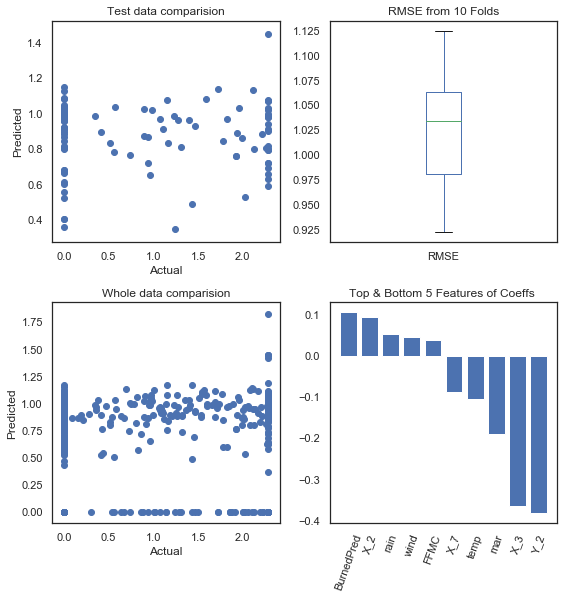

In [549]:
## Reproducing the best paramters and validation
LS_cust=linear_model.Lasso(alpha=.01,   normalize=False)
LS_cust.fit(X_train, y_train)
Validations(LS_cust,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

In [597]:
print("Out of "+str(len(LS_cust.coef_))+" Features, "+str(len(list(filter(lambda x: x == 0, list(LS_cust.coef_)) )))+" are became 0 as part of lasso regularization")

Out of 42 Features, 24 are became 0 as part of lasso regularization


### Ridge

In [529]:
RD_grid_result=param_selection(linear_model.Ridge(),{'alpha':[0.00001, 0.0001, 0.001,0.01],'normalize':[False]}, X_train, y_train,10)
RD_grid_result.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.01, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Validation with Train dataset :
_______________________________
RMSE Score 0.8941712755870866
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: -0.4190467305261989 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 1.0029548077399837
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.17039909524995345 , Max :2.3913625709150885
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.25035103 1.08696477 0.81003918 1.25955005 1.3991929  1.14278839
 0.92248566 1.11635989 0.97537944 1.67861749]
Cross Validation RMSE Mean Score 1.164172880408148
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.2032722979027777
 
Validation with Burned Category variable 
_______________________________
RMSE of Log Transformed Area : 1.0202209468713608
RMSE of Orginal Area : 1.773807560366301
 
Top & Bottom 5 Features of Coeff's
_______________________________
     Featrures   

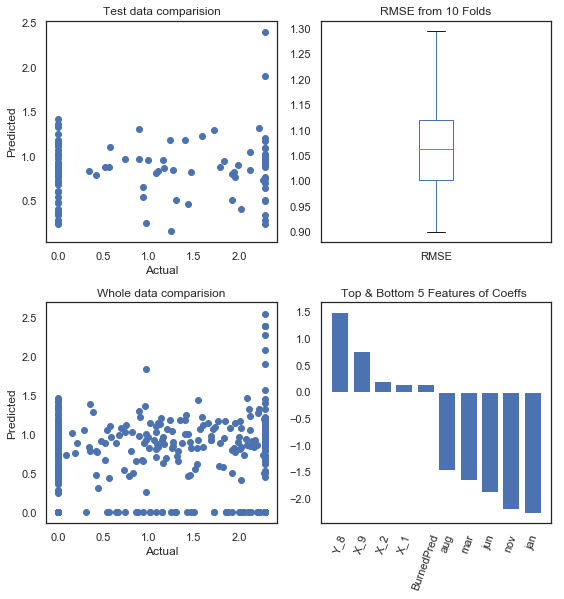

In [550]:
Validations(RD_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,1 )

### SVM

In [598]:
SVR_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100,150], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 
                  'kernel':['rbf'],'epsilon': [ 0.001, 0.01, 0.1,1, 10]}
SVR_grid_result=param_selection(SVR(),SVR_param_grid, X_train, y_train,10)

Fitting 10 folds for each of 245 candidates, totalling 2450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 2450 out of 2450 | elapsed:  1.1min finished


In [534]:
SVR_grid_result.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Validation with Train dataset :
_______________________________
RMSE Score 0.1416014917285908
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.06806537624566733 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 0.9979802404839989
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.10012325514091425 , Max :2.184760445255794
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.021597   1.00340111 0.85885115 1.10590464 1.30198644 1.02439549
 0.91690927 1.0978059  0.91870607 1.03427184]
Cross Validation RMSE Mean Score 1.0283828901270895
Cross Validation RMSE Mean Score Orginial Burned Area Value 1.796539863965395
 
Validation with Burned Category variable 
_______________________________
RMSE of Log Transformed Area : 0.7853577872847886
RMSE of Orginal Area : 1.1931914964033443
 


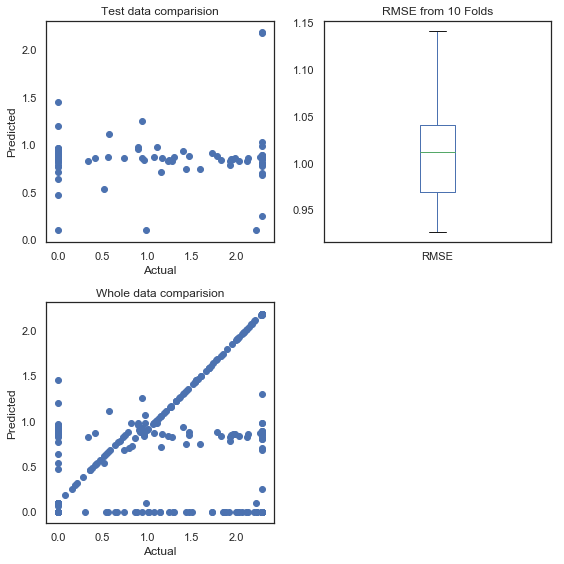

In [551]:
Validations(SVR_grid_result.best_estimator_ ,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0)

### Decision Tree

In [277]:
#max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
#min_samples_split : The minimum number of samples required to split an internal node
#min_samples_leaf  : The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
#max_leaf_nodes : Grow a tree with max_leaf_nodes in best-first fashion

DT_param_grid = {'criterion': ['mse', 'mae'],'max_depth': range(1,10,2),'min_samples_split': range(2,10,2) ,'min_samples_leaf': [20, 40, 100], 'max_leaf_nodes': [5, 20, 100]}
DT_grid_result=param_selection(tree.DecisionTreeRegressor(),DT_param_grid, X_train, y_train,10)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mse', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 4}


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   35.7s finished


In [278]:
DT_grid_result.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Validation with Train dataset :
_______________________________
RMSE Score 0.9256196405530916
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.4414148520142246 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 1.00324590264398
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.4414148520142246 , Max :1.6624204831509375
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.09842875 1.01813251 0.7983531  1.26049875 1.39938189 1.02173059
 0.89656294 1.14493598 0.94625049 1.1074835 ]
Cross Validation RMSE Mean Score 1.069175849122938
Cross Validation RMSE Mean Score Orginial Burned Area Value 1.9129777772320176
 
Validation with Burned Category variable 
_______________________________
RMSE of Log Transformed Area : 1.0395899762298666
RMSE of Orginal Area : 1.828057205915572
 


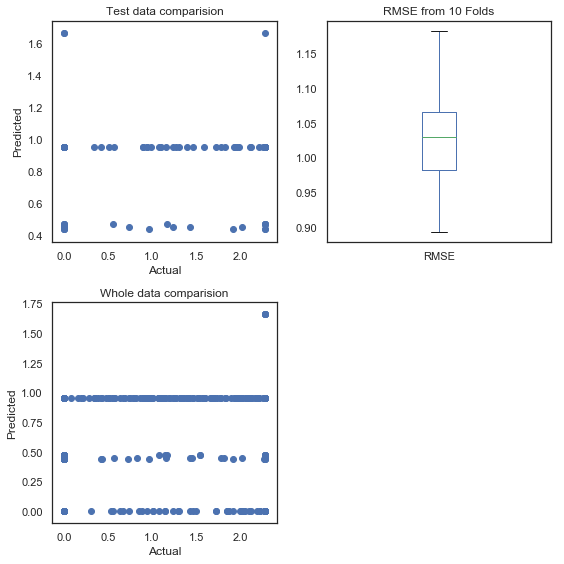

In [552]:
# Validations(DT_grid_result.best_estimator_ ,ncols,Standarized_Data2, X_train, X_test, y_train, y_test )
Validations(DT_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0 )

Validation with Train dataset :
_______________________________
RMSE Score 0.8382539237912895
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.209234378475065 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 1.0267165588595202
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.209234378475065 , Max :2.099019280407615
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.19276777 1.13768423 0.81719056 1.35057267 1.47478296 1.18226705
 0.9770366  1.17102183 1.05650191 1.18528358]
Cross Validation RMSE Mean Score 1.1545109153425828
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.172471430929158
 
Validation with Burned Category variable 
_______________________________
RMSE of Log Transformed Area : 1.0240918628154292
RMSE of Orginal Area : 1.7845655444704738
 


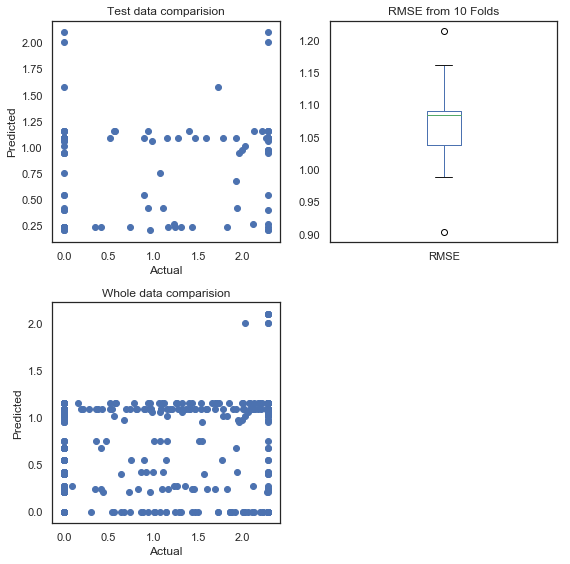

In [555]:
## Changing the max depth of tree. it gives a better result.
DT_Cust=tree.DecisionTreeRegressor(criterion='mse', max_depth=10,min_samples_split=4,max_leaf_nodes=20,  min_samples_leaf=10)
DT_Cust.fit(X_train, y_train)
Validations(DT_Cust,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,0 )

### Random Forest

In [572]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
RF_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

RF_grid_result=param_selection(RandomForestRegressor(),RF_param_grid, X_train, y_train,5)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 100, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 48.9min finished


In [573]:
RF_grid_result.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Validation with Train dataset :
_______________________________
RMSE Score 0.8948922224666468
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.47024207103628585 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 0.9720597938246455
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.4990584278383317 , Max :2.00024852984729
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.09828874 1.0047503  0.74908716 1.26903002 1.37161121 1.02681541
 0.87804723 1.14414054 0.97573192 1.07114766]
Cross Validation RMSE Mean Score 1.0588650202884515
Cross Validation RMSE Mean Score Orginial Burned Area Value 1.8830968751331656
 
Validation with Burned Category variable 
_______________________________
RMSE of Log Transformed Area : 1.0194677143300002
RMSE of Orginal Area : 1.7717190249235362
 
Top 10 Features of Coeff's
_______________________________
     Featrures     Coeff
4

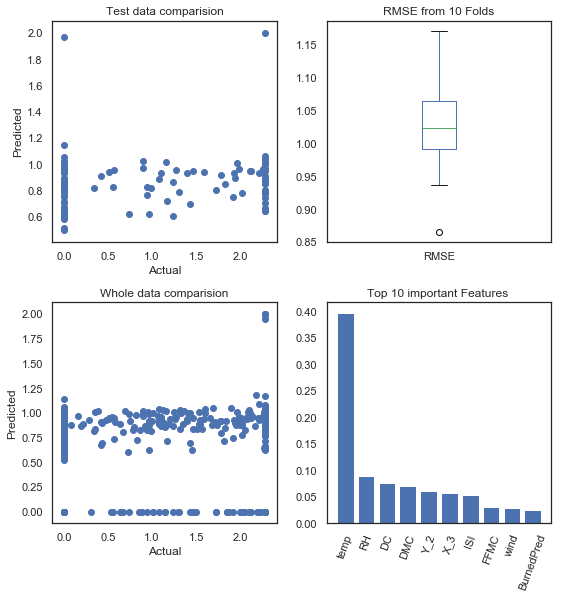

In [603]:
Validations(RF_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,2 )

Validation with Train dataset :
_______________________________
RMSE Score 0.892741648416756
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.4213366587964867 , Max :2.284608420607845
 
Validation with Test dataset :
_______________________________
RMSE Score 0.9713903969023461
Actual Data : Min: 0.0 , Max :2.284608420607845
Predicted Data : Min: 0.4247474639425799 , Max :2.0278722314057673
 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.09611718 1.0003413  0.77336047 1.26758711 1.38462551 1.01113544
 0.87709847 1.13743219 0.96414515 1.07284587]
Cross Validation RMSE Mean Score 1.0584688674168532
Cross Validation RMSE Mean Score Orginial Burned Area Value 1.881954954229542
 
Validation with Burned Category variable 
_______________________________
RMSE of Log Transformed Area : 1.0196186342267917
RMSE of Orginal Area : 1.772137364039767
 
Top 10 Features of Coeff's
_______________________________
     Featrures     Coeff
4  

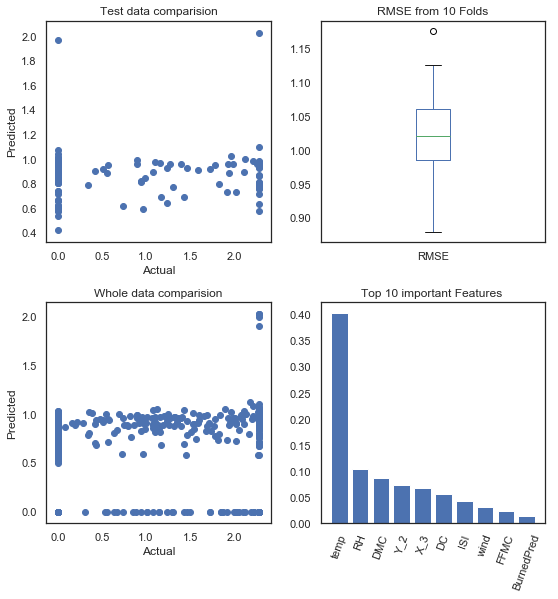

In [605]:
RDF_Cust=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
RDF_Cust.fit(X_train, y_train)
Validations(RDF_Cust,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,2 )

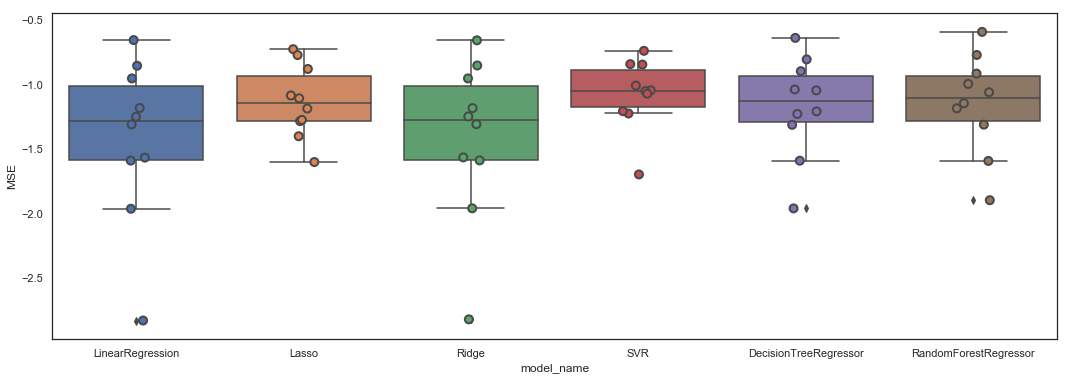

model_name
DecisionTreeRegressor   -1.170818
Lasso                   -1.129988
LinearRegression        -1.413561
RandomForestRegressor   -1.144728
Ridge                   -1.411757
SVR                     -1.071532
Name: MSE, dtype: float64

In [606]:
## All model comparision 

models = [
    LinearRegression(fit_intercept=True, n_jobs=None,normalize=False),
    linear_model.Lasso(alpha=.01,   normalize=False),
    linear_model.Ridge(alpha=0.01, normalize=False),
    SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1, kernel='rbf'),
    tree.DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
    RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)    
]

CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], scoring='neg_mean_squared_error', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

fig, ax = plt.subplots(figsize=(18,6))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'MSE'])
sns.boxplot(x='model_name', y='MSE', data=cv_df)
sns.stripplot(x='model_name', y='MSE', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').MSE.mean()


Over all **SVM Regression** is giving best results 